In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import statistics as sts
import random as rnd
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Source Github https://github.com/msg-byu/ML-for-CurieTemp-Predictions/tree/main

In [3]:
!gdown 1mzxUcJe2iYPpuQxwx30Y7xI8jbPesrY6

Downloading...
From: https://drive.google.com/uc?id=1mzxUcJe2iYPpuQxwx30Y7xI8jbPesrY6
To: /content/DS1+DS2.csv
100% 1.78M/1.78M [00:00<00:00, 22.3MB/s]


In [4]:
data = pd.read_csv('DS1+DS2.csv')

In [5]:
data


,Name,TC,Ag,Al,Am,As,Au,B,Ba,Be,...,Ti,Tl,Tm,U,V,W,Y,Yb,Zn,Zr
0,Ag4Ce3Ge4,10.0,0.363636,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ag51Pr14,13.0,0.784615,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AgAl3Ce,3.0,0.200000,0.6,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AgAuCd2,310.0,0.250000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AgCe,5.5,0.500000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,V1,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4556,W1,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4557,Y1,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4558,Yb1,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


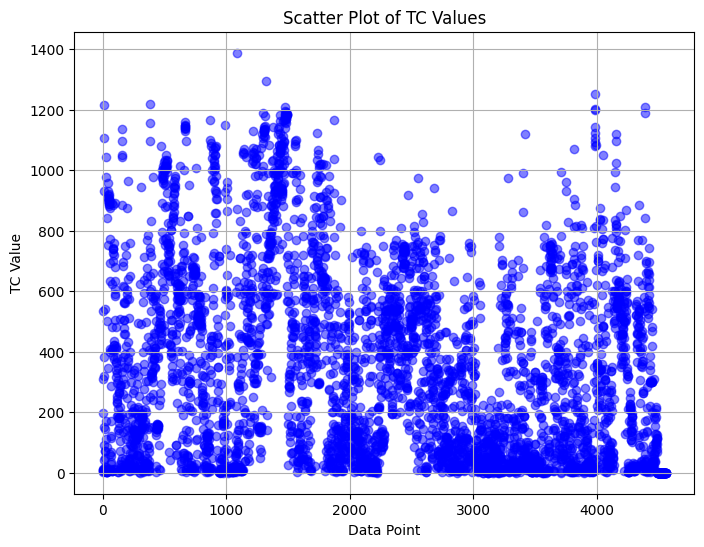

In [6]:
tc_values = data['TC']
plt.figure(figsize=(8, 6))
plt.scatter(range(len(tc_values)), tc_values, color='b', alpha=0.5)
plt.title('Scatter Plot of TC Values')
plt.xlabel('Data Point')
plt.ylabel('TC Value')
plt.grid(True)
plt.show()

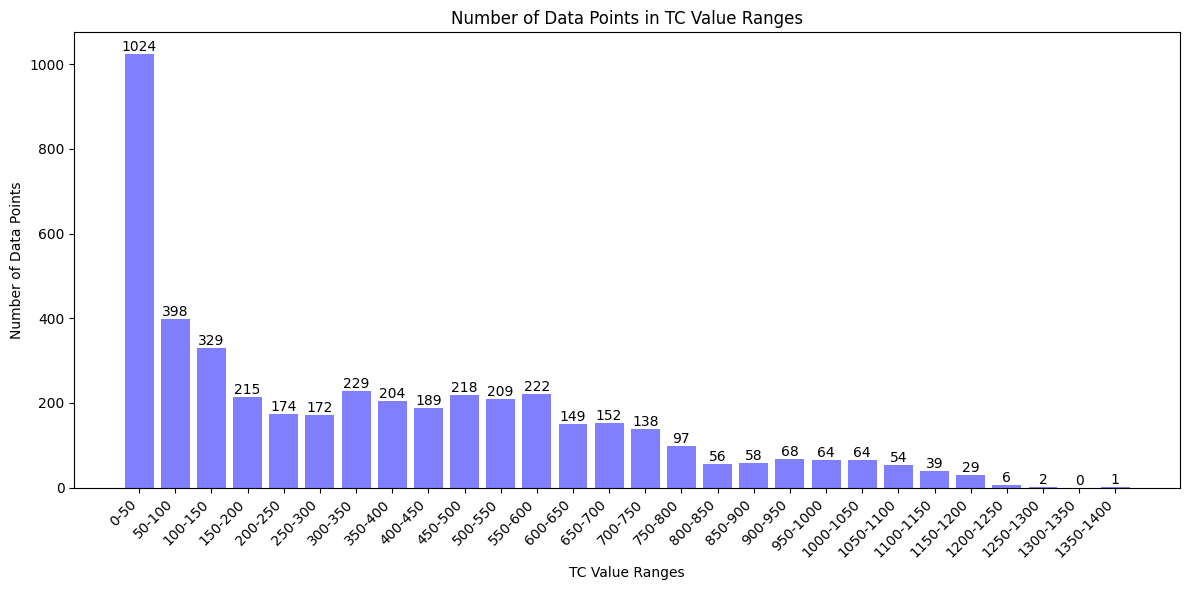

In [7]:
ranges = [(i, i + 50) for i in range(0, 1400, 50)]  # Define your desired ranges
# Step 5: Count the number of data points in each range
counts = []
for r in ranges:
    lower, upper = r
    count = data[(data['TC'] >= lower) & (data['TC'] < upper)].shape[0]
    counts.append(count)
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
bars = plt.bar(range(len(ranges)), counts, color='b', alpha=0.5, tick_label=[f'{r[0]}-{r[1]}' for r in ranges])
plt.title('Number of Data Points in TC Value Ranges')
plt.xlabel('TC Value Ranges')
plt.ylabel('Number of Data Points')
plt.xticks(range(len(ranges)), [f'{r[0]}-{r[1]}' for r in ranges], rotation=45, ha='right')
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

R2 Score (Test Data): 0.5902071001511381
Root Mean Squared Error: 199.14589109077406
Cross-Validation rmse : [220.4328042  210.3611469  236.09871082 262.18467531 196.62650546
 200.77861565 160.70935789 255.13394666 208.93146987 213.25634545]
Mean rmse: 216.45135782063775
Cross-Validation R^2 scores : [ 0.40296409  0.58033099  0.56802238  0.42722023  0.3100421   0.02999586
 -0.01591618 -0.06502165  0.44605763  0.38039574]
Mean R^2: 0.30640911885861416


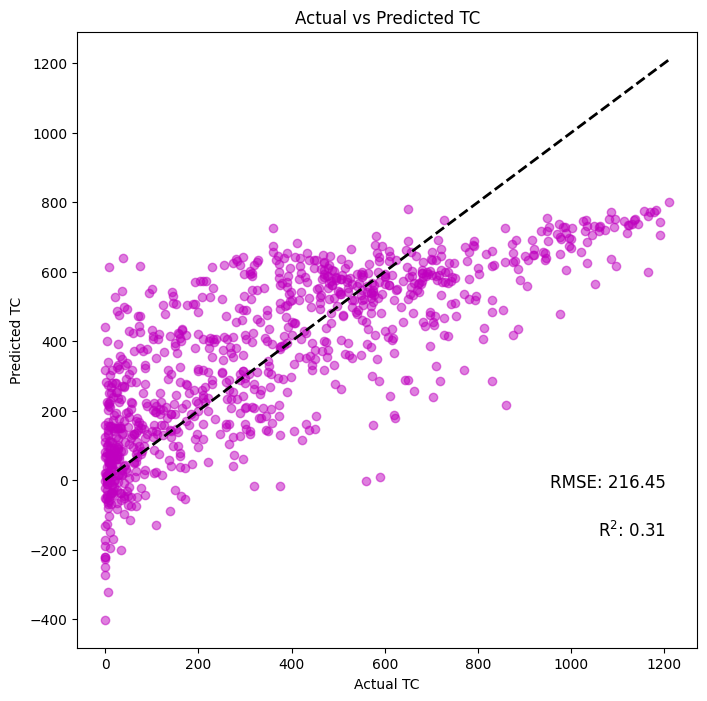

In [8]:
#simple Linear Regression
X = data.drop(['TC','Name'], axis=1)  # Features
y = data['TC']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

# Step 4: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
print("R2 Score (Test Data):", r2_test)
print("Root Mean Squared Error:", rmse)
# Printing the coefficients and intercept
#print("Coefficients:", model.coef_)
#print("Intercept:", model.intercept_)
# Performing 5-fold cross-validation
n=10
cv_scores = cross_val_score(model, X, y, cv=n, scoring='neg_root_mean_squared_error')
print("Cross-Validation rmse :", -cv_scores)
rmse_mean=-np.mean(cv_scores)
print("Mean rmse:",rmse_mean )
cv_scores = cross_val_score(model, X, y, cv=n, scoring='r2')
print("Cross-Validation R^2 scores :", cv_scores)
r2_mean=np.mean(cv_scores)
print("Mean R^2:",r2_mean )

# Optional Step 6: Visualization
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5,c='m')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of parity
plt.xlabel("Actual TC")
plt.ylabel("Predicted TC")
plt.title("Actual vs Predicted TC")
plt.text(0.95, 0.26, "RMSE: %.2f"%rmse_mean, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.text(0.95, 0.18, "R$^2$: %.2f"%r2_mean, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.show()



RMSE: 193.70989379184957
R2 Score: 0.6082424250576469
200.0
Cross-Validation rmse : [239.05615875 271.0847535  281.63118177 358.05143384 204.84366222
 195.88403898 175.12469513 217.60055109 237.20996184 208.63460528]
Mean rmse: 238.9121042408896
Cross-Validation R^2 scores : [ 0.40296409  0.58033099  0.56802238  0.42722023  0.3100421   0.02999586
 -0.01591618 -0.06502165  0.44605763  0.38039574]
Mean R^2: 0.30640911885861416


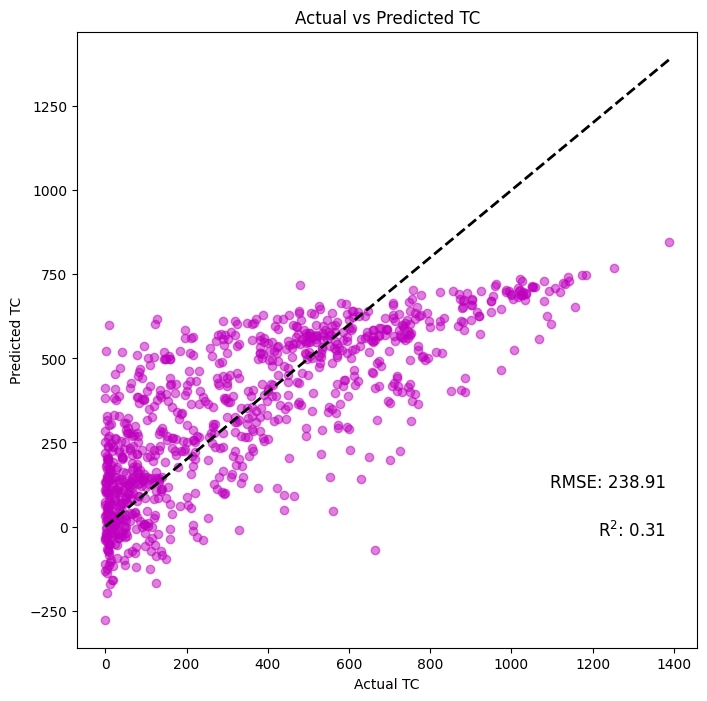

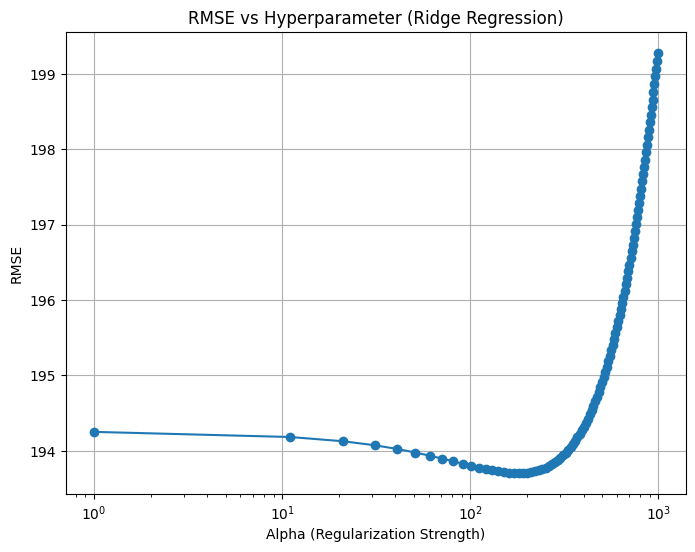

In [9]:
X = data.drop(['TC','Name'], axis=1)  # Features
y = data['TC']  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=33)
# Step 4: Train the regularized linear regression model (Ridge regression)
alpha = 200.0  # Regularization strength (hyperparameter to be tuned)
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')
print(alpha)
# Performing 5-fold cross-validation
n=10
cv_scores = cross_val_score(ridge, X, y, cv=n, scoring='neg_root_mean_squared_error')
print("Cross-Validation rmse :", -cv_scores)
rmse_mean=-np.mean(cv_scores)
print("Mean rmse:",rmse_mean )
cv_scores = cross_val_score(model, X, y, cv=n, scoring='r2')
print("Cross-Validation R^2 scores :", cv_scores)
r2_mean=np.mean(cv_scores)
print("Mean R^2:",r2_mean )

# Optional Step 6: Visualization
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5,c='m')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of parity
plt.xlabel("Actual TC")
plt.ylabel("Predicted TC")
plt.title("Actual vs Predicted TC")
plt.text(0.95, 0.26, "RMSE: %.2f"%rmse_mean, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.text(0.95, 0.18, "R$^2$: %.2f"%r2_mean, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.show()
alphas = [i for i in range (1,1001,10)]  # Example values for regularization strength (alpha)

# Train Ridge regression models with different values of alpha
rmse_values = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Plot RMSE vs hyperparameter
plt.figure(figsize=(8, 6))
plt.plot(alphas, rmse_values, marker='o')
plt.xscale('log')  # Set logarithmic scale for the x-axis
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('RMSE')
plt.title('RMSE vs Hyperparameter (Ridge Regression)')
plt.grid(True)
plt.show()



Mean Squared Error (MSE): 13444.740515521771
Root Mean Squared Error (RMSE): 115.95145758256673
R2 Score: 0.8654087800226744


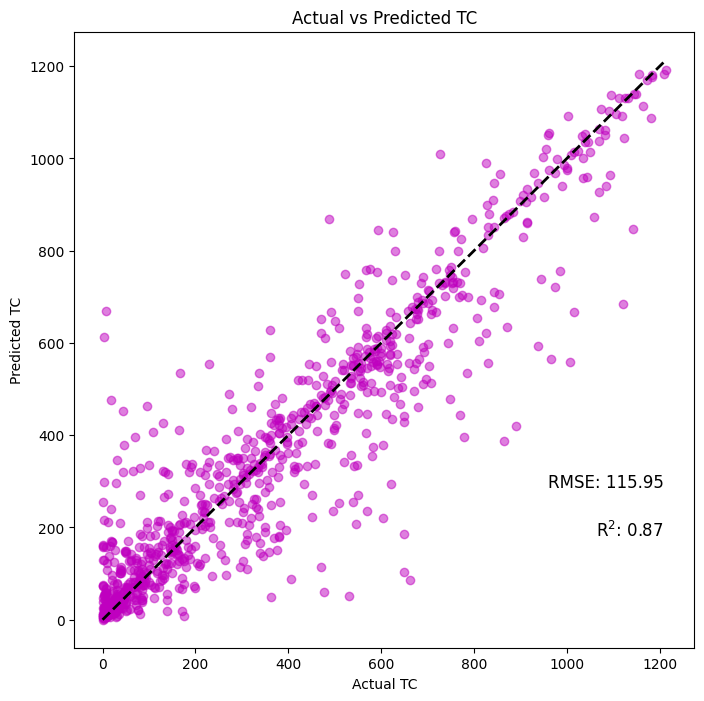

In [14]:
X = data.drop(['TC','Name'], axis=1)  # Features
y = data['TC']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

rf_model = RandomForestRegressor(n_estimators=162, random_state=81)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')

# Optional Step 6: Visualization
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5,c='m')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of parity
plt.xlabel("Actual TC")
plt.ylabel("Predicted TC")
plt.title("Actual vs Predicted TC")
plt.text(0.95, 0.26, "RMSE: %.2f"%rmse, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.text(0.95, 0.18, "R$^2$: %.2f"%r2, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.show()



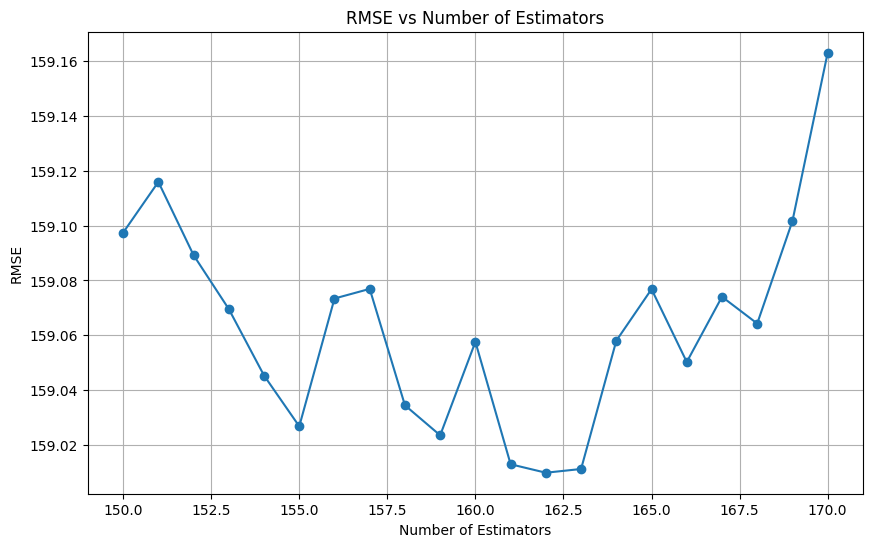

Best Number of Estimators: 162


In [13]:
estimator_range = range(150,171,1)  # Example range from 10 to 200 with step size 10

# List to store RMSE scores for each number of estimators
rmse_scores = []

# Iterate over different numbers of estimators
for n_estimators in estimator_range:
    # Create a Random Forest model with the current number of estimators
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Perform 5-fold cross-validation and calculate RMSE
    cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_squared_error')
    rmse_scores.append((-cv_scores.mean()) ** 0.5)

# Plot RMSE vs number of estimators
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, rmse_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Estimators')
plt.grid(True)
plt.show()

# Find the best number of estimators
best_n_estimators = estimator_range[np.argmin(rmse_scores)]
print("Best Number of Estimators:", best_n_estimators)

Mean Squared Error (MSE): 14980.560920501855
Root Mean Squared Error (RMSE): 122.39510170142371
R2 Score: 0.8436624372307966


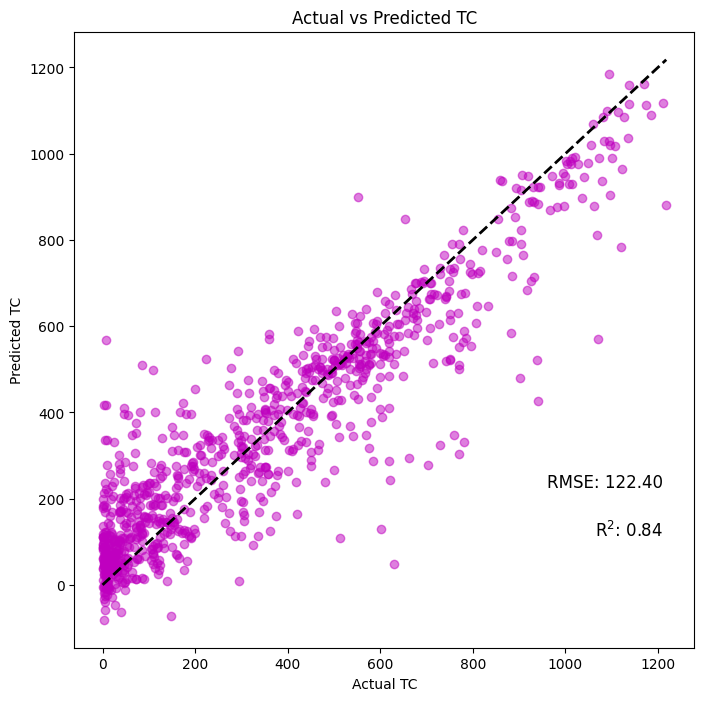

In [11]:
X = data.drop(['TC','Name'], axis=1)  # Features
y = data['TC']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
# Step 5: Train the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.2,max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

# Step 6: Evaluate the model
y_pred = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')

# Optional Step 6: Visualization
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5,c='m')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of parity
plt.xlabel("Actual TC")
plt.ylabel("Predicted TC")
plt.title("Actual vs Predicted TC")
plt.text(0.95, 0.26, "RMSE: %.2f"%rmse, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.text(0.95, 0.18, "R$^2$: %.2f"%r2, transform=plt.gca().transAxes, ha='right', fontsize=12)
plt.show()